In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [48]:
df = pd.DataFrame(np.random.randint(1,10,32).reshape(8,4), columns=['a','b','c','d'])

In [49]:
df

,a,b,c,d
0,6,5,4,2
1,9,2,8,7
2,3,1,7,4
3,9,4,5,4
4,1,7,4,5
5,6,8,1,4
6,2,6,4,7
7,2,4,3,5


In [50]:
x = df.a.value_counts()

In [51]:
y = df.b.value_counts()

([array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
  array([6., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 2 Lists of Patches objects>)

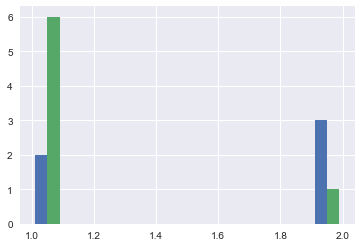

In [52]:
plt.hist([x,y])

In [53]:
hist,bins = np.histogram(x)

In [54]:
hist

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int64)

In [55]:
bins

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

### Chapter 3

In [56]:
# Try doing what the book's PMF function does with pandas

vals = pd.Series([1,2,2,3,5])
vals

0    1
1    2
2    2
3    3
4    5
dtype: int64

In [57]:
pmf = vals.value_counts(normalize=True,).sort_index()
pmf

1    0.2
2    0.4
3    0.2
5    0.2
dtype: float64

In [58]:
pmf[2]

0.4

### Trying out some scipy.stats and numpy stuff for pmf

In [59]:
import scipy.stats as stats

In [60]:
a = np.random.randint(1, 5, size=20)
a

array([3, 4, 3, 2, 2, 2, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3, 3, 4, 2, 2])

In [61]:
val, cnt = np.unique(a, return_counts=True)

In [62]:
rv = stats.rv_discrete(values=(val, cnt/len(a)))

In [63]:
rv

In [64]:
rv.pk

array([0.05, 0.3 , 0.45, 0.2 ])

In [65]:
rv.xk

array([1, 2, 3, 4])

In [66]:
rv.pmf(1)

0.05

In [67]:
rv.pmf(5)

0.0

In [68]:
rv.pmf(2)

0.3

In [69]:
rv.cdf(2)

0.35

In [70]:
rv.mean(), rv.std(), rv.var()

(2.8, 0.8124038404635967, 0.660000000000001)

In [71]:
# Try creating the rv from the pandas Series
rv2 = stats.rv_discrete(values=(pmf.index, pmf))

In [72]:
rv2.xk

array([1, 2, 3, 5], dtype=int64)

In [73]:
rv2.pk

array([0.2, 0.4, 0.2, 0.2])

In [74]:
l = [1,2,3]
n = np.array([1,2,3])

In [75]:
l*3, n*3

([1, 2, 3, 1, 2, 3, 1, 2, 3], array([3, 6, 9]))

In [76]:
sum(l)

6

<BarContainer object of 4 artists>

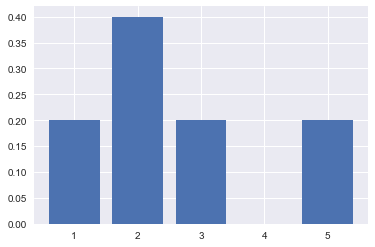

In [77]:
#Try plotting rv2
plt.bar(rv2.xk, rv2.pk)

<BarContainer object of 4 artists>

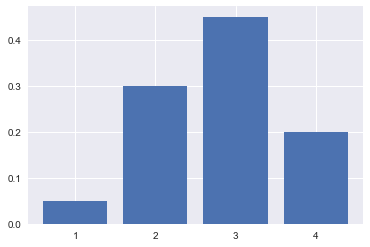

In [78]:
#Try plotting rv
plt.bar(rv.xk, rv.pk, tick_label=rv.xk)

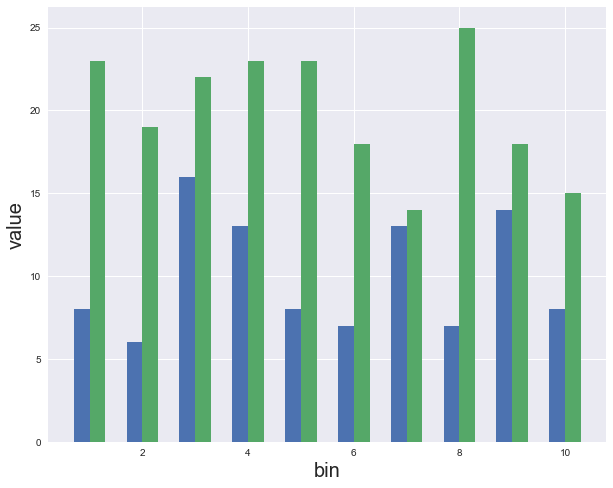

In [79]:
plt.style.use('seaborn')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

data = np.random.randint(1,11,100)
val, cnt = np.unique(data, return_counts=True)
ax.bar(val, cnt, width=-.3, align='edge')

data2 = np.random.randint(1,11,200)
val2, cnt2 = np.unique(data2, return_counts=True)
ax.bar(val2, cnt2, width=.3, align='edge')

ax.set_xlabel('bin', fontsize=20)
ax.set_ylabel('value', fontsize=20)

plt.show()

In [80]:
val,cnt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 8,  6, 16, 13,  8,  7, 13,  7, 14,  8], dtype=int64))

In [81]:
val2,cnt2

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([23, 19, 22, 23, 23, 18, 14, 25, 18, 15], dtype=int64))

In [82]:
# Messing around with methods of RVs
stats.norm.cdf(-1)

0.15865525393145707

In [83]:
stats.norm.pdf(3)

0.0044318484119380075

In [84]:
import math
1/math.sqrt(6.28)

0.3990434422338111

In [85]:
stats.norm.pdf(0)

0.3989422804014327

In [86]:
# So pdf returns the 'y-value' at a certain x, and cdf returns the area under the curve left of x